# Лабораторная работа №4
# Исследование демографической модели Мальтуса

In [1]:
import numpy as np
from scipy.constants import g, pi
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from scipy.integrate import solve_ivp

In [2]:
%matplotlib notebook
style = {'description_width': 'initial'}

## Простейшая модель 
$\frac{dN}{dt} = (a(t) - b(t))N $

$a(t)$ - коэффиециент рождаемости

$b(t)$ - коэффиециент смертности

### Случай с постоянными коэффиециентами

<IPython.core.display.Javascript object>


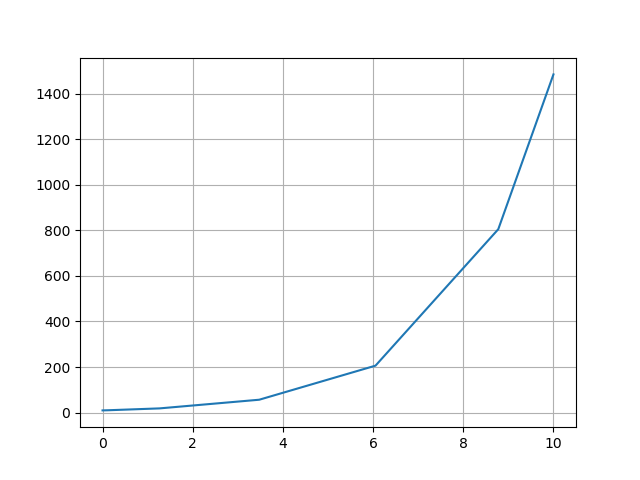

In [3]:
def maltus_model(t, y, a, b):
    return (a(t) - b(t))*y

fig = plt.figure()
ax = fig.add_subplot(111)
ax.grid()

def maltus_plotter(a, b, max_time, start_value):
    ax.clear()
    ax.grid()
    solve = solve_ivp(lambda t, y: maltus_model(t, y, lambda t: a, lambda t: b), (0,max_time), [start_value])
    ax.plot(solve['t'], solve['y'][0])

In [4]:
interact(maltus_plotter, a=widgets.FloatSlider(min=0, max=2, step=0.05, value=1),
                  b=widgets.FloatSlider(min=0, max=2, step=0.05, value=0.5),
              max_time=widgets.IntSlider(min=4, max=20, step=1, value=10),
              start_value=widgets.IntSlider(min=2, max=20, step=1, value=10)
        );

interactive(children=(FloatSlider(value=1.0, description='a', max=2.0, step=0.05), FloatSlider(value=0.5, desc…

## Коэффиециенты зависящие то времени

<IPython.core.display.Javascript object>


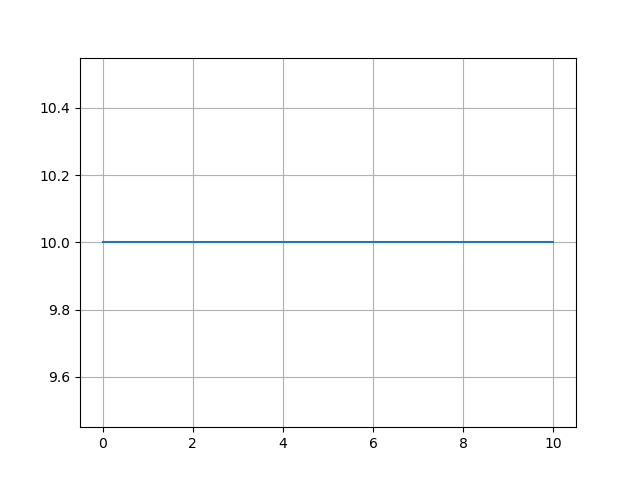

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.grid()
def func_maltus_plotter(a, b, max_time, start_value):
    ax.clear()
    ax.grid()
    solve = solve_ivp(lambda t, y: maltus_model(t, y, a,  b), (0,max_time), [start_value])
    ax.plot(solve['t'], solve['y'][0])

In [6]:
functions = [lambda t: t, 
             lambda t: t/2, 
             lambda t: 1+np.sin(t), 
             lambda t: 1+np.cos(t), 
             lambda t: 2+(t-7)]
interact(func_maltus_plotter, a=functions,
                              b=functions,
              max_time=widgets.IntSlider(min=4, max=20, step=1, value=10),
              start_value=widgets.IntSlider(min=2, max=20, step=1, value=10)
        );

interactive(children=(Dropdown(description='a', options=(<function <lambda> at 0x000001AE12AF6510>, <function …

## Модель численности с равновесным состоянием

$\frac{dN}{dt} = \alpha (1 + rV - \frac{N}{N_p})N$ 

$V$~$N(0,1)$  $\alpha>0$ $r>0$

<IPython.core.display.Javascript object>


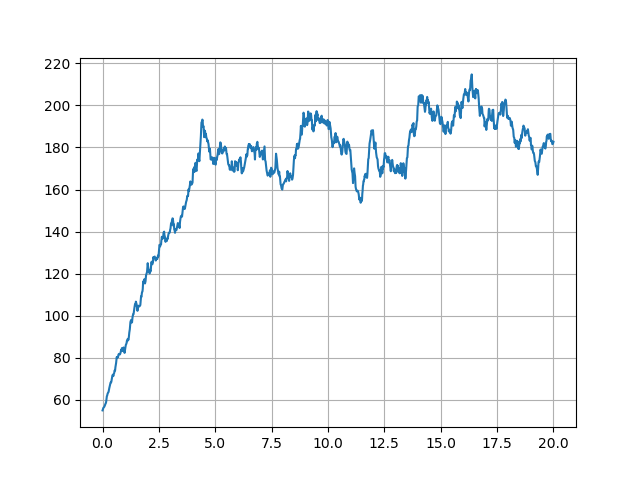

In [7]:
def equilibrium_maltus_model(t, y, alpha, N_p, r):
    return alpha*(1 + r*np.random.randn() - y/N_p)*y

fig = plt.figure()
ax = fig.add_subplot(111)
ax.grid()

def equilibrium_maltus_plotter(alpha, np, max_time, start_value,r):
    ax.clear()
    ax.grid()
    solve = solve_ivp(lambda t, y: equilibrium_maltus_model(t, y, alpha,  np, r), (0,max_time), [start_value])
    ax.plot(solve['t'], solve['y'][0])

In [9]:
interact(equilibrium_maltus_plotter, 
             alpha = widgets.FloatSlider(min=0, max=2, step=0.05, value=1),
             np=widgets.IntSlider(min=2, max=200, step=1, value=50),
             start_value=widgets.IntSlider(min=2, max=300, step=1, value=40),
             max_time=widgets.IntSlider(min=4, max=20, step=1, value=10),
             r = widgets.FloatSlider(min=0, max=1, step=0.05, value=0.5),
        );

interactive(children=(FloatSlider(value=1.0, description='alpha', max=2.0, step=0.05), IntSlider(value=50, des…